In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#read csv file
df = pd.read_csv("../data/preprocessig_data.csv")

In [3]:

from sklearn.preprocessing import MinMaxScaler

# creates an instance of the MinMaxScaler, setting the range of the output to be between 0 and 70.
scaler = MinMaxScaler(feature_range=(0, 70))

# extracts the column CO2 Emissions(g/km) from the DataFrame df and reshapes it into a 2D array.
column_to_scale = df['CO2 Emissions(g/km)'].values.reshape(-1, 1)

# This scales the values in column_to_scale using the MinMaxScaler.it and transform the column using the scaler
scaled_column = scaler.fit_transform(column_to_scale)

# This replaces the original column in the DataFrame with the scaled values.
df['CO2 Emissions(g/km)'] = scaled_column

In [4]:
# Features and target variable
#features (x) and the target variable (y).
x = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

In [5]:
x.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0
1,ACURA,ILX,COMPACT,15.0,4.0,AS5,Z,9.9,6.7,8.5,33.0
2,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0
3,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0
4,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0


In [ ]:
df.head()

In [6]:
# List of categorical column names
categorical_columns = ['Make','Model','Vehicle Class','Transmission', 'Fuel Type']

# Use Pandas get_dummies to one-hot encode the categorical columns
x = pd.get_dummies(x, columns=categorical_columns)

# Now, all the specified categorical columns are one-hot encoded
x

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.0,4.0,9.9,6.7,8.5,33.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,15.0,4.0,9.9,6.7,8.5,33.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2.4,4.0,11.2,7.7,9.6,29.0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1.5,4.0,6.0,5.8,5.9,48.0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,3.5,6.0,12.7,9.1,11.1,25.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,2.0,4.0,10.7,7.7,9.4,30.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6327,2.0,4.0,11.2,8.3,9.9,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6328,2.0,4.0,11.7,8.6,10.3,27.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6329,2.0,4.0,11.2,8.3,9.9,29.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
# for x (6331 rows, 1689 feature columns)
x.shape

(6331, 1689)

In [8]:
# for y (6331 target values, 1)
y.shape

(6331,)

In [9]:
y

0        9.107590
1        9.107590
2       10.567139
3        5.604671
4       12.552127
          ...    
6326    10.450375
6327    11.209341
6328    11.676397
6329    11.209341
6330    12.143453
Name: CO2 Emissions(g/km), Length: 6331, dtype: float64

In [10]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)
#random_state it will produce the same split every time the code is run
#x_train: The feature variables for the training set (80% of x).
#x_test: The feature variables for the testing set (20% of x).
#y_train: The target variable for the training set (80% of y).
#y_test: The target variable for the testing set (20% of y).

In [11]:
x_train.shape

(5064, 1689)

In [12]:
y_train.shape

(5064,)

In [13]:
x_test.shape

(1267, 1689)

In [14]:
y_test.shape

(1267,)

In [15]:
##train

from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regressor
regressor_dt = DecisionTreeRegressor()

#This trains the decision tree regression model using the training data (x_train for features and y_train for target values).
regressor_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [16]:
#Test

#This uses the trained decision tree regressor model (regressor_dt) to make predictions on the test dataset x_test.
# Make predictions
y_pred = regressor_dt.predict(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
# A score of 1.0 indicates perfect predictions, while a score closer to 0 indicates poor predictions.
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
#R² tells how well the model fits the data (higher is better, with 1 being a perfect fit).

Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 1.05
Root Mean Squared Error (RMSE): 1.02
R-squared (R2) Score: 0.92


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor_dt,x_train,y_train,cv=10)

#The final result is the average of the performance metrics across all 10 folds.
#avg 0.76672687

array([0.99013154, 0.99092091, 0.89868607, 0.35686854, 0.60878912,
       0.99164521, 0.99097486, 0.81875189, 0.87813122, 0.76741489])

In [19]:
# Creates a DataFrame with the actual and predicted values for easy comparison.
#'y_test': The true target value (e.g., CO2 emissions in this case).
#'y_pred': The predicted target value from the model.
predection = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
predection.head()

,y_test,y_pred
4135,12.727273,12.785655
4349,15.004170,15.004170
6006,3.853211,3.736447
4320,10.275229,10.275229
5704,11.034195,10.800667


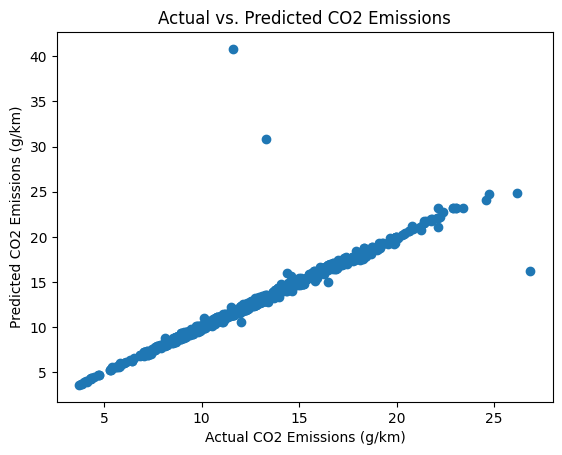

In [20]:
import matplotlib.pyplot as plt


# Create a scatter plot with accurate labels
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Actual vs. Predicted CO2 Emissions")
plt.show()
